In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
oyo = pd.read_json('OYO.json')

In [35]:
oyo.shape

(6551, 10)

In [36]:
oyo.head()

,NAME,ADDRESS,RATING,RATED BY,BASE_COST,FINAL_COST,AMENITYS,ROOM SIZE,CATEGORY,IMAGES
0,OYO Flagship SATYAM INN LODGE,5-11-51/41D Near New Bus Stand Beside Maruti M...,3.7,3.0,₹916,₹1068,"[WiFi, AC, TV]",Room size: 100 sqft,Good,[https://images.oyoroomscdn.com/uploads/hotel_...
1,OYO Flagship 39898 Hotel Raj Inn,"0, Near AIT college, Pushkar BypassNear AIT Co...",4.0,30.0,₹733,₹861,"[AC, Free Wifi, Kitchen, TV, Power backup, Gey...",Room size: 100 sqft,Very Good,[https://images.oyoroomscdn.com/uploads/hotel_...
2,OYO Flagship 46691 Jaldapara Rhino Resort,"Plot- 1, Block- 3, Purba Khairbari, Kharibari,...",5.0,1.0,₹1535,₹1763,"[AC, TV, Free Wifi, Power backup, Geyser, Park...",Room size: 100 sqft,Fabulous,[https://images.oyoroomscdn.com/uploads/hotel_...
3,OYO 45569 Goyal's Inn,"C-19 & 20-s, Opp Water Tank Near Glitz Cinema ...",3.7,12.0,₹639,₹756,"[Free Wifi, AC, TV, Daily housekeeping]",Room size: 110 sqft,Good,[https://images.oyoroomscdn.com/uploads/hotel_...
4,OYO Sandhana Homestay,"Sh16, Paschim Jitpur, Alipurduar",3.6,6.0,₹1711,₹1966,"[AC, TV, Free Wifi, Queen Sized Bed, Geyser, P...",Room size: 100 sqft,Good,[https://images.oyoroomscdn.com/uploads/hotel_...


In [37]:
oyo.dtypes

NAME           object
ADDRESS        object
RATING         object
RATED BY      float64
BASE_COST      object
FINAL_COST     object
AMENITYS       object
ROOM SIZE      object
CATEGORY       object
IMAGES         object
dtype: object

In [38]:
oyo.isnull().sum()

NAME            0
ADDRESS         0
RATING        487
RATED BY      786
BASE_COST       6
FINAL_COST      0
AMENITYS        0
ROOM SIZE       6
CATEGORY      509
IMAGES          0
dtype: int64

In [39]:
oyo.isna().sum()

NAME            0
ADDRESS         0
RATING        487
RATED BY      786
BASE_COST       6
FINAL_COST      0
AMENITYS        0
ROOM SIZE       6
CATEGORY      509
IMAGES          0
dtype: int64

In [ ]:
del oyo['IMAGES']

In [124]:
del oyo['amenities']

In [126]:
oyo = oyo.rename(columns={
    'NAME' : 'name',
    'ADDRESS' : 'address',
    'RATING' : 'rating',
    'RATED BY' : 'rated_by',
    'BASE_COST' : 'base_cost',
    'FINAL_COST' : 'final_cost',
    'ROOM SIZE' : 'room_size',
    'CATEGORY' : 'category'
})

In [127]:
oyo.head()

,name,address,rating,rated_by,base_cost,final_cost,room_size,category
0,Flagship SATYAM INN LODGE,5-11-51/41D Near New Bus Stand Beside Maruti M...,3.7,3,916,1068,100 sqft,Good
1,Flagship 39898 Hotel Raj Inn,"0, Near AIT college, Pushkar BypassNear AIT Co...",4.0,30,733,861,100 sqft,Very Good
2,Flagship 46691 Jaldapara Rhino Resort,"Plot- 1, Block- 3, Purba Khairbari, Kharibari,...",5.0,1,1535,1763,100 sqft,Fabulous
3,45569 Goyal's Inn,"C-19 & 20-s, Opp Water Tank Near Glitz Cinema ...",3.7,12,639,756,110 sqft,Good
4,Sandhana Homestay,"Sh16, Paschim Jitpur, Alipurduar",3.6,6,1711,1966,100 sqft,Good


In [128]:
oyo.dropna(subset=['base_cost', 'room_size', 'rating', 'rated_by'], axis=0, inplace=True)

In [129]:
oyo.isnull().sum()

name          0
address       0
rating        0
rated_by      0
base_cost     0
final_cost    0
room_size     0
category      0
dtype: int64

In [ ]:
oyo = oyo[~oyo.rating.str.contains("NEW")]

In [90]:
oyo.convert_dtypes()

,name,address,rating,rated_by,base_cost,final_cost,amenities,room_size,category
0,OYO Flagship SATYAM INN LODGE,5-11-51/41D Near New Bus Stand Beside Maruti M...,3.7,3,₹916,₹1068,"[WiFi, AC, TV]",Room size: 100 sqft,Good
1,OYO Flagship 39898 Hotel Raj Inn,"0, Near AIT college, Pushkar BypassNear AIT Co...",4.0,30,₹733,₹861,"[AC, Free Wifi, Kitchen, TV, Power backup, Gey...",Room size: 100 sqft,Very Good
2,OYO Flagship 46691 Jaldapara Rhino Resort,"Plot- 1, Block- 3, Purba Khairbari, Kharibari,...",5.0,1,₹1535,₹1763,"[AC, TV, Free Wifi, Power backup, Geyser, Park...",Room size: 100 sqft,Fabulous
3,OYO 45569 Goyal's Inn,"C-19 & 20-s, Opp Water Tank Near Glitz Cinema ...",3.7,12,₹639,₹756,"[Free Wifi, AC, TV, Daily housekeeping]",Room size: 110 sqft,Good
4,OYO Sandhana Homestay,"Sh16, Paschim Jitpur, Alipurduar",3.6,6,₹1711,₹1966,"[AC, TV, Free Wifi, Queen Sized Bed, Geyser, P...",Room size: 100 sqft,Good
...,...,...,...,...,...,...,...,...,...
6543,OYO Home HR Homes,"plot No 1,Darshan Nagar Faizabaad Road, Ayodh...",3.0,2,₹3947,₹4470,"[TV, AC, Free Wifi, Kitchen, Geyser, Power bac...",OYO Classic,Fair
6544,OYO Home Shri Hari Lodge Homestay,"18/2/23, Vishal Nursing Home,Tulsi Nagar Near...",4.0,3,₹5454,₹6148,"[AC, TV, Free Wifi, Kitchen, Geyser, Power bac...",OYO Classic,Very Good
6545,OYO Home Pari Mahal Homestay,"phase 2 , opposite RTO office kaushal puri, Ay...",3.0,13,₹3940,₹4463,"[TV, AC, Free Wifi, Kitchen, Geyser, Power bac...",OYO Classic,Fair
6546,OYO Home Kanak Hotel & Resort Homestay,"Plot no 215,Ismailpur, National highway, Ayodhya",4.1,8,₹4495,₹5074,"[TV, AC, Free Wifi, Kitchen, Geyser, Power bac...",OYO Classic,Very Good


In [98]:
oyo.name = oyo.name.str.lstrip('OYO ')
oyo.base_cost = oyo.base_cost.str.lstrip('₹')
oyo.final_cost = oyo.final_cost.str.lstrip('₹')

In [134]:
oyo.room_size = oyo.room_size.str.lstrip('Room size: ')
oyo.room_size = oyo.room_size.str.rstrip(' sqft')


In [143]:
oyo.rating = oyo.rating.astype(float)
oyo.base_cost = oyo.base_cost.astype(int)
oyo.final_cost = oyo.final_cost.astype(int)

In [148]:
oyo[oyo.room_size.str.contains('OYO Classic')]

,name,address,rating,rated_by,base_cost,final_cost,room_size,category
170,Home Vedica Home Stays,"Vedica Home Stays, Ambalavayal, Near R A R S, ...",4.1,83,1157,1336,OYO Classic,Very Good
171,Home Elegant Stay Fine Nest Homes,"Finenest Homes, Thurky Road, Kalpetta, Wayanad",3.4,99,1359,1552,OYO Classic,Fair
215,Home Sharma Guest House,"Plot no.-178,, Gunnaur Chauraha, Budanu Road, ...",5.0,2,412,501,OYO Classic,Fabulous
272,Capital O 82629 Hotel Prithvi Lok,"706, Santosh Nagar, Gadaniyawas, Udaipur",5.0,26,1090,1255,OYO Classic,Fabulous
280,Flagship Hotel Pop Tavern,"Lekshmi Towers, Trivandrum",3.4,158,1104,1280,OYO Classic,Fair
...,...,...,...,...,...,...,...,...
6543,Home HR Homes,"plot No 1,Darshan Nagar Faizabaad Road, Ayodh...",3.0,2,3947,4470,OYO Classic,Fair
6544,Home Shri Hari Lodge Homestay,"18/2/23, Vishal Nursing Home,Tulsi Nagar Near...",4.0,3,5454,6148,OYO Classic,Very Good
6545,Home Pari Mahal Homestay,"phase 2 , opposite RTO office kaushal puri, Ay...",3.0,13,3940,4463,OYO Classic,Fair
6546,Home Kanak Hotel & Resort Homestay,"Plot no 215,Ismailpur, National highway, Ayodhya",4.1,8,4495,5074,OYO Classic,Very Good


In [ ]:
oyo.room_size.replace('OYO Classic', '120', inplace=True)

In [161]:
oyo[oyo.room_size.str.len() > 3]['room_size'].value_counts()

room_size
Saver: Spaces with functional amenitie    10
16500                                      1
2250                                       1
6400                                       1
8000                                       1
OYO Deluxe                                 1
37500                                      1
OYO SPOT ON NON-AC                         1
1600                                       1
15000                                      1
5000                                       1
11000                                      1
12100                                      1
Name: count, dtype: Int64

In [162]:
for i in ('Saver: Spaces with functional amenitie', 'OYO Deluxe', 'OYO SPOT ON NON-AC'):
    oyo = oyo[~oyo.room_size.str.contains(i)]

In [164]:
oyo.room_size = oyo.room_size.astype(int)

In [165]:
oyo.dtypes

name          string[python]
address       string[python]
rating               float64
rated_by               Int64
base_cost              int64
final_cost             int64
room_size              int64
category      string[python]
dtype: object

In [168]:
oyo.head()

,name,address,rating,rated_by,base_cost,final_cost,room_size,category
0,Flagship SATYAM INN LODGE,5-11-51/41D Near New Bus Stand Beside Maruti M...,3.7,3,916,1068,100,Good
1,Flagship 39898 Hotel Raj Inn,"0, Near AIT college, Pushkar BypassNear AIT Co...",4.0,30,733,861,100,Very Good
2,Flagship 46691 Jaldapara Rhino Resort,"Plot- 1, Block- 3, Purba Khairbari, Kharibari,...",5.0,1,1535,1763,100,Fabulous
3,45569 Goyal's Inn,"C-19 & 20-s, Opp Water Tank Near Glitz Cinema ...",3.7,12,639,756,110,Good
4,Sandhana Homestay,"Sh16, Paschim Jitpur, Alipurduar",3.6,6,1711,1966,100,Good


In [184]:
oyo.groupby('category').rating.mean().reset_index().sort_values(by='rating')

,category,rating
2,Fair,3.029163
3,Good,3.695391
4,Very Good,4.175434
0,Excellent,4.613289
1,Fabulous,4.985481


In [213]:
oyo.groupby('category').final_cost.mean().reset_index().sort_values(by='final_cost')

,category,final_cost
3,Good,1043.356594
2,Fair,1083.275062
4,Very Good,1165.523699
1,Fabulous,1200.687117
0,Excellent,1276.543421


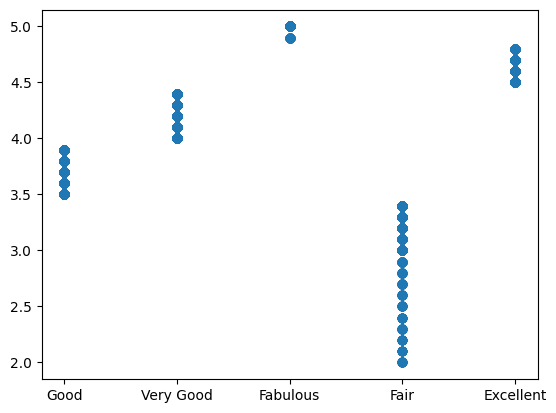

In [198]:
plt.scatter(oyo.category, oyo.rating)
plt.show()

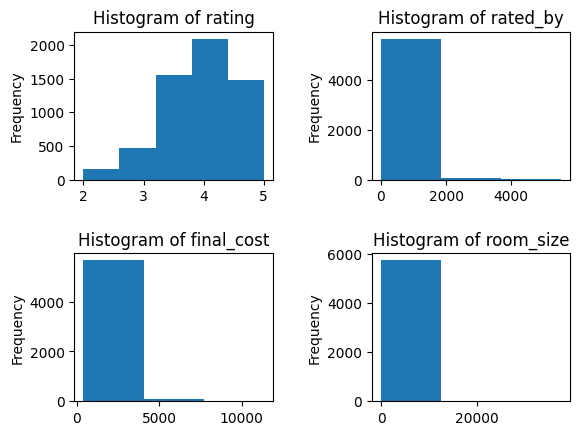

In [211]:
fig, ax= plt.subplots(2,2)

cols = ['rating', 'rated_by', 'final_cost', 'room_size']
bin = [5, 3, 3, 3]
colnum = 0

for i in range(2):
    for j in range(2):
        ax[i, j].hist(oyo[cols[colnum]], bins=bin[colnum])
        ax[i, j].set_title(f"Histogram of {cols[colnum]}")
        ax[i, j].set_ylabel("Frequency")
        colnum+=1

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

<Axes: xlabel='final_cost', ylabel='base_cost'>

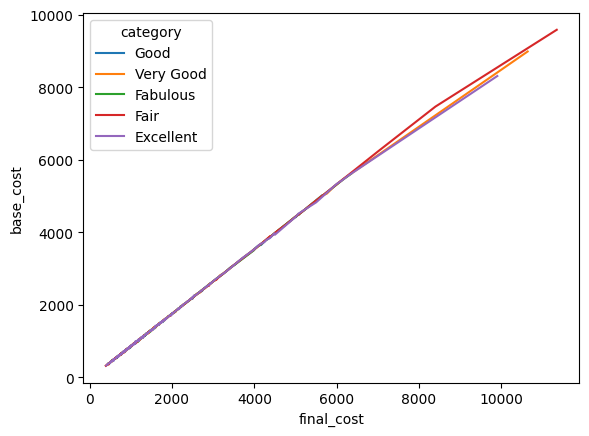

In [216]:
sns.lineplot(data=oyo, x=oyo.final_cost, y=oyo.base_cost, hue=oyo.category)

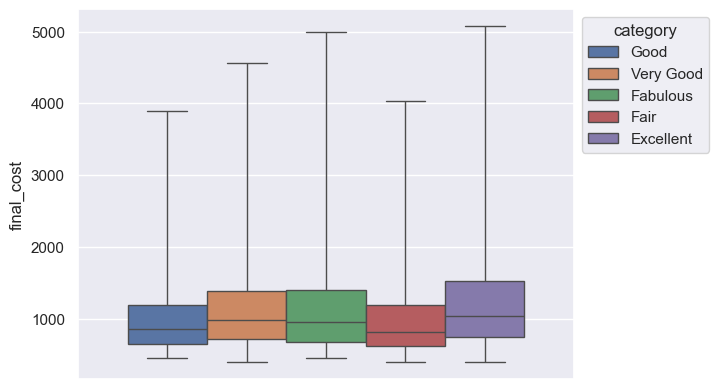

In [278]:
box = sns.boxplot(data=oyo,y = oyo.final_cost, hue=oyo.category, whis = 5, showfliers=False, dodge = True)
sns.move_legend(box, "upper left", bbox_to_anchor=(1, 1))

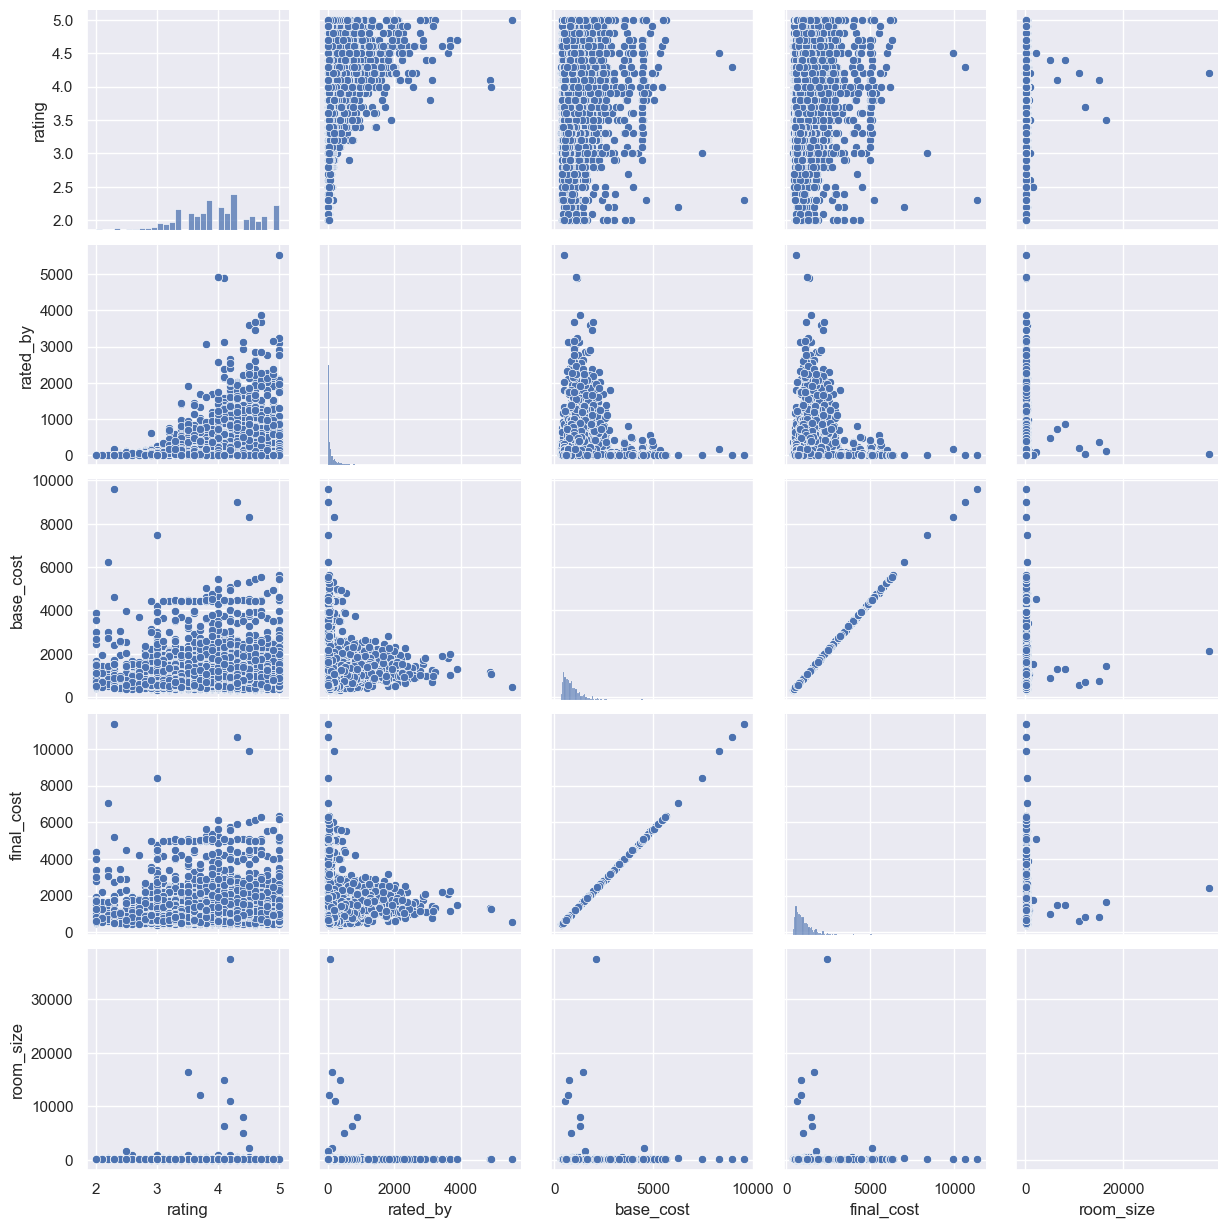

In [280]:
sns.pairplot(oyo)

name          0
address       0
rating        0
rated_by      0
base_cost     0
final_cost    0
room_size     0
category      0
dtype: int64

In [290]:
oyo.corr(numeric_only=True)

,rating,rated_by,base_cost,final_cost,room_size
rating,1.000000,0.214351,0.065915,0.065526,0.006939
rated_by,0.214351,1.000000,0.111192,0.110687,0.011603
base_cost,0.065915,0.111192,1.000000,0.999836,0.029034
final_cost,0.065526,0.110687,0.999836,1.000000,0.028984
room_size,0.006939,0.011603,0.029034,0.028984,1.000000


In [304]:
pd.set_option('max_colwidth', None)

In [305]:
oyo.address.iloc[0:10]

0    5-11-51/41D Near New Bus Stand Beside Maruti Mart land mark Satyam Provisions Priyadarshi Nagar Nirmal dist Telangana, , India , Adilabad
1                                                            0, Near AIT college, Pushkar BypassNear AIT College, Pushkar Bypass, Ajmer, Ajmer
2                                                                        Plot- 1, Block- 3, Purba Khairbari, Kharibari, Alipurduar, Alipurduar
3                                                        C-19 & 20-s, Opp Water Tank Near Glitz Cinema B.k Kaul Nagar Ajmer(raj.) India, Ajmer
4                                                                                                             Sh16, Paschim Jitpur, Alipurduar
5                                                                                                                    Sh 21, Dibiyapur, Auraiya
6                                                                                      A-25 Saray babarpur, pargana, ajitmal, auraiya, Auraiya

In [307]:
def extract_last_word(text):
    words = text.split()
    return words[-1]

oyo['city'] = oyo['address'].apply(extract_last_word)

In [308]:
oyo.head()

,name,address,rating,rated_by,base_cost,final_cost,room_size,category,city
0,Flagship SATYAM INN LODGE,"5-11-51/41D Near New Bus Stand Beside Maruti Mart land mark Satyam Provisions Priyadarshi Nagar Nirmal dist Telangana, , India , Adilabad",3.7,3,916,1068,100,Good,Adilabad
1,Flagship 39898 Hotel Raj Inn,"0, Near AIT college, Pushkar BypassNear AIT College, Pushkar Bypass, Ajmer, Ajmer",4.0,30,733,861,100,Very Good,Ajmer
2,Flagship 46691 Jaldapara Rhino Resort,"Plot- 1, Block- 3, Purba Khairbari, Kharibari, Alipurduar, Alipurduar",5.0,1,1535,1763,100,Fabulous,Alipurduar
3,45569 Goyal's Inn,"C-19 & 20-s, Opp Water Tank Near Glitz Cinema B.k Kaul Nagar Ajmer(raj.) India, Ajmer",3.7,12,639,756,110,Good,Ajmer
4,Sandhana Homestay,"Sh16, Paschim Jitpur, Alipurduar",3.6,6,1711,1966,100,Good,Alipurduar


In [310]:
del oyo['address']

In [311]:
oyo.head()

,name,rating,rated_by,base_cost,final_cost,room_size,category,city
0,Flagship SATYAM INN LODGE,3.7,3,916,1068,100,Good,Adilabad
1,Flagship 39898 Hotel Raj Inn,4.0,30,733,861,100,Very Good,Ajmer
2,Flagship 46691 Jaldapara Rhino Resort,5.0,1,1535,1763,100,Fabulous,Alipurduar
3,45569 Goyal's Inn,3.7,12,639,756,110,Good,Ajmer
4,Sandhana Homestay,3.6,6,1711,1966,100,Good,Alipurduar


In [330]:
oyo.to_csv('oyo.csv')